Importing needed libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import model_selection
import missingno as msno

In [3]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print('Total number of houses:',len(df))


Total number of houses: 1460


In [5]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [6]:
pd.set_option("display.max_rows", 82)
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

<AxesSubplot: >

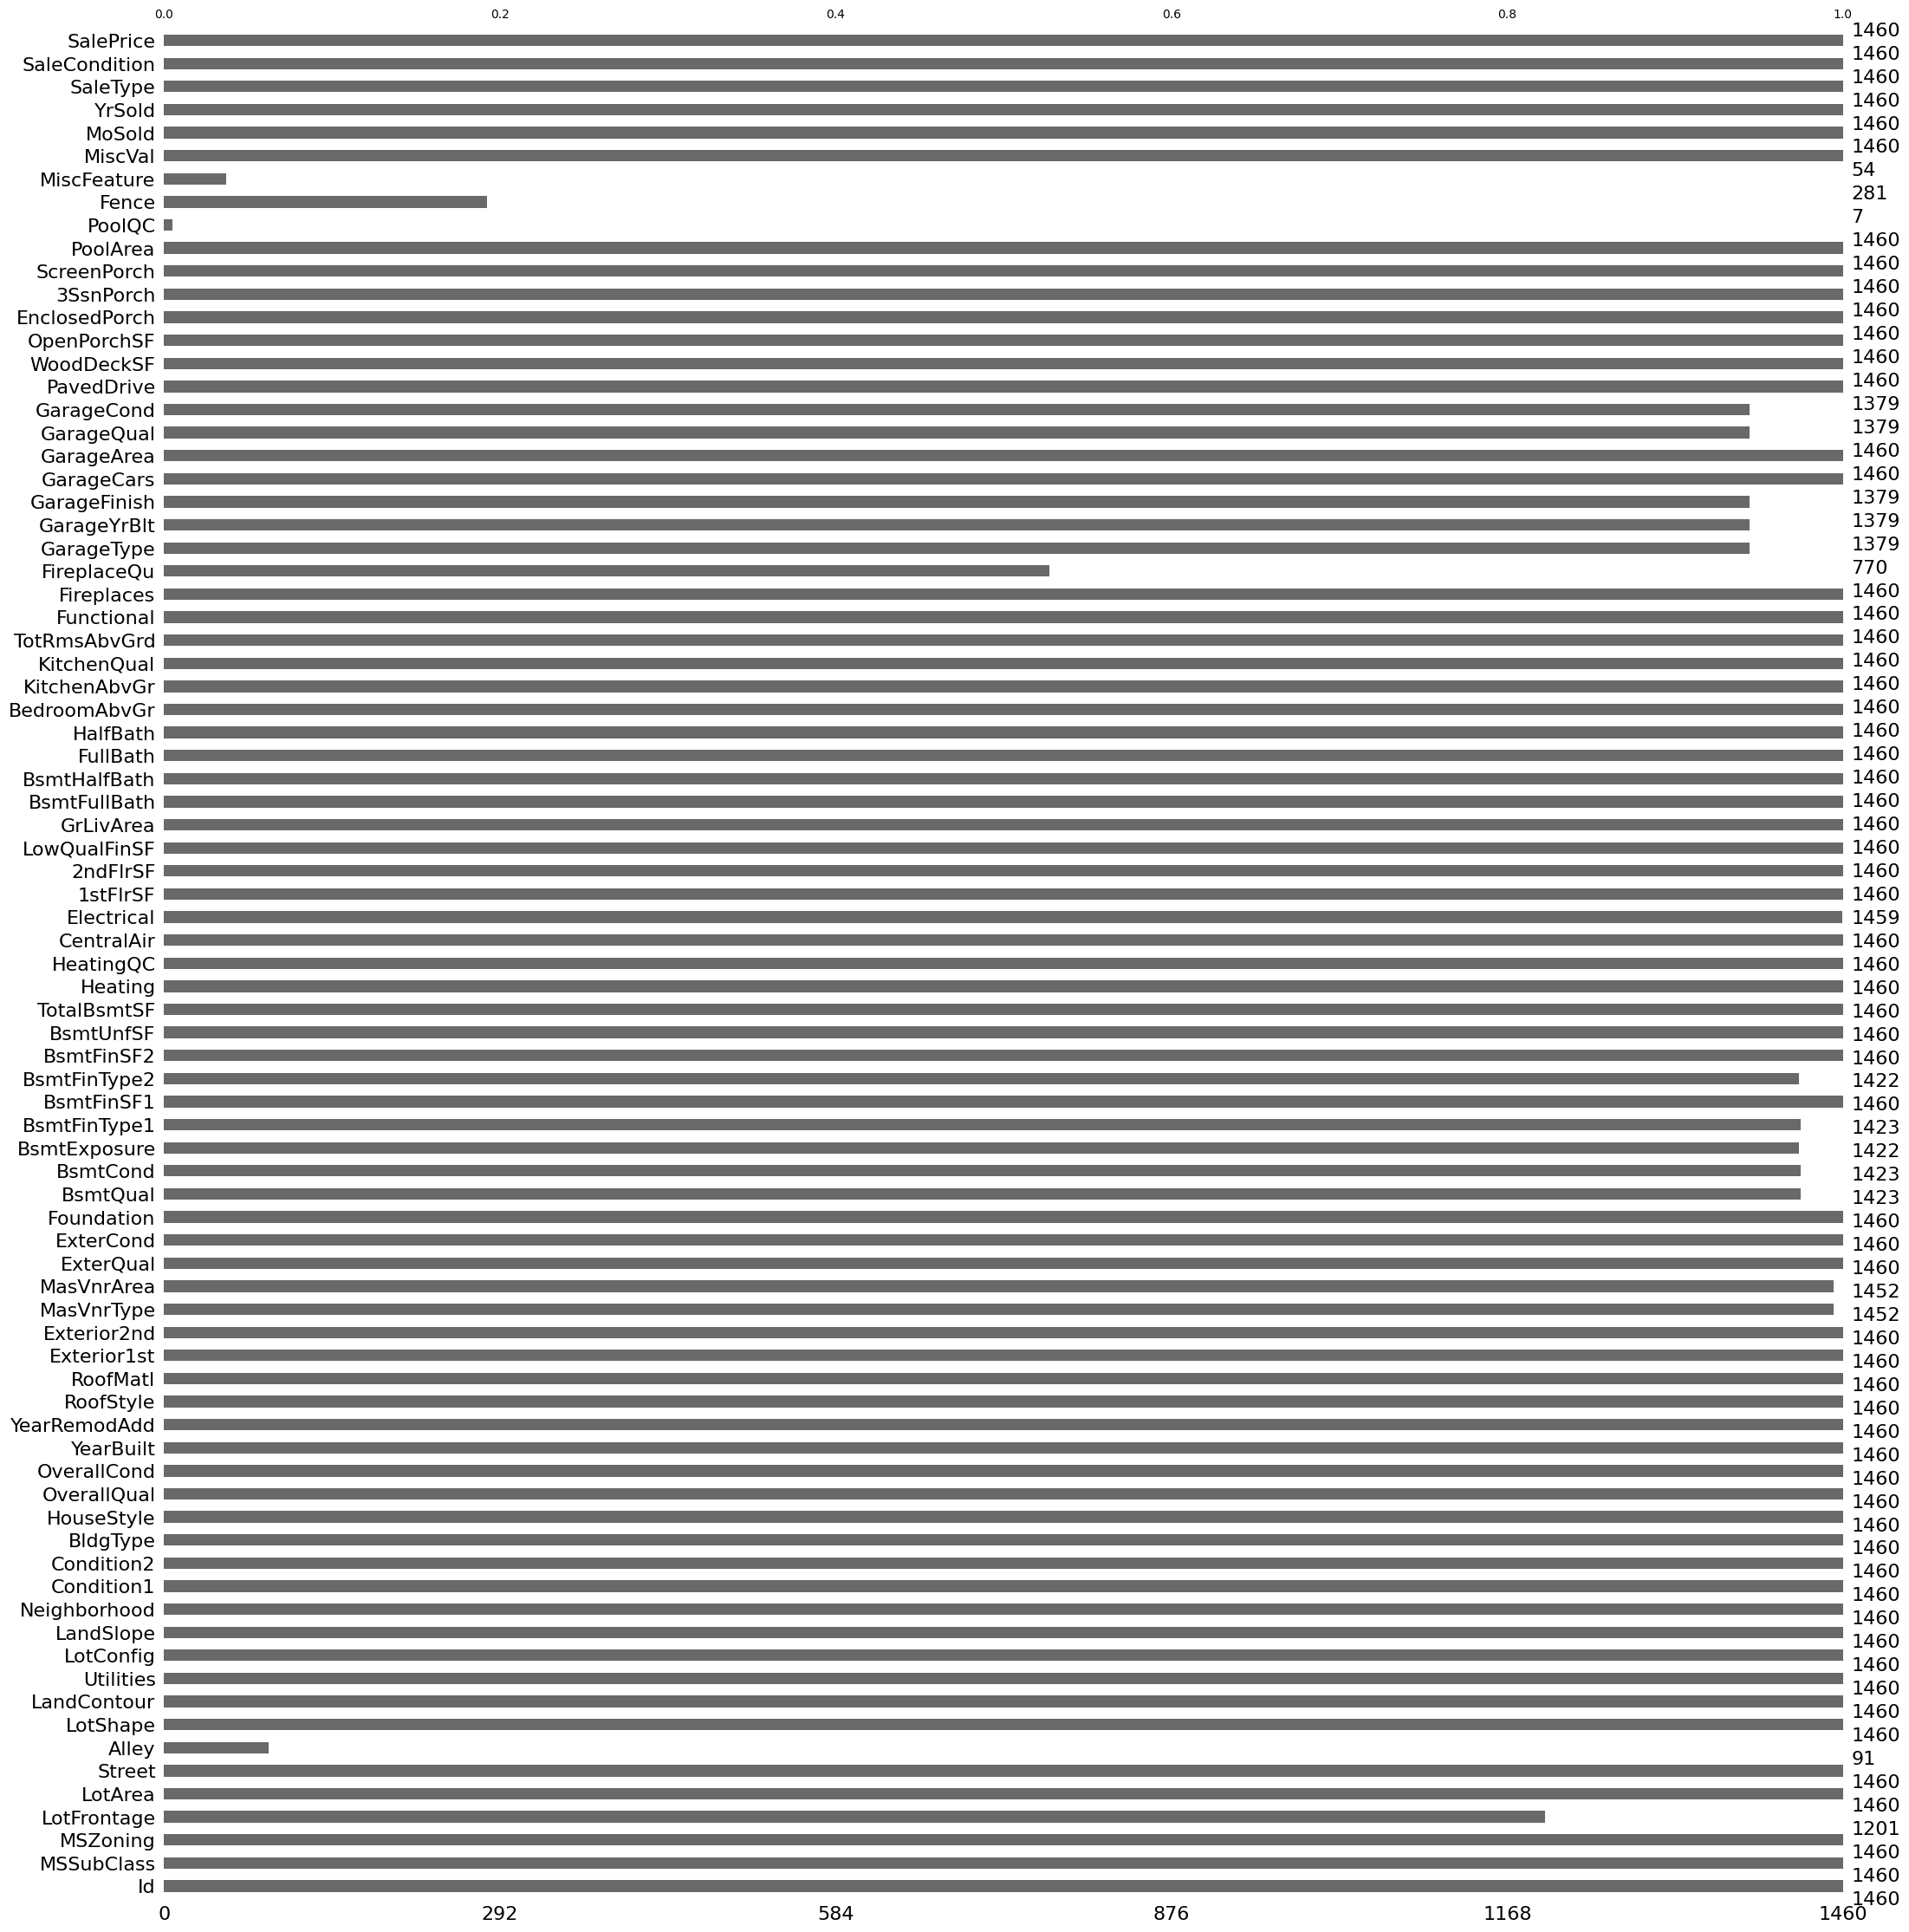

In [7]:
msno.bar(df)


Trying first with 2 features

In [9]:
train_df = df[['LotArea', 'YearBuilt','SalePrice']].copy()
train_df

,LotArea,YearBuilt,SalePrice
0,8450,2003,208500
1,9600,1976,181500
2,11250,2001,223500
3,9550,1915,140000
4,14260,2000,250000
...,...,...,...
1455,7917,1999,175000
1456,13175,1978,210000
1457,9042,1941,266500
1458,9717,1950,142125


In [10]:
train_df.isna().sum()

LotArea      0
YearBuilt    0
SalePrice    0
dtype: int64

In [11]:
df2 = pd.read_csv('test.csv')
test_df = df2[['LotArea', 'YearBuilt']].copy()
test_df

,LotArea,YearBuilt
0,11622,1961
1,14267,1958
2,13830,1997
3,9978,1998
4,5005,1992
...,...,...
1454,1936,1970
1455,1894,1970
1456,20000,1960
1457,10441,1992


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import linear_model
from sklearn import preprocessing
X = train_df.drop(['SalePrice'], axis = 1)
y = train_df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Split the data into training and testing set using scikit-learn train_test_split function. 
#We are using 80% of the data for training and 20% for testing, train_test_split() returns four objects:
            #X_train: the subset of our features used for training
            #X_test: the subset which will be our ‘hold-out’ set – what we’ll use to test the model
            #y_train: the target variable SalePrice which corresponds to X_train
            #y_test: the target variable SalePrice which corresponds to X_test

In [14]:
lr = linear_model.LinearRegression()

In [15]:
model = lr.fit(X_train, y_train)

In [16]:
predictions = model.predict(X_test)

In [18]:
from math import sqrt
print ('MAE is:', mean_absolute_error(y_test, predictions))
print ('MSE is:', mean_squared_error(y_test, predictions))
print ('RMSE is:', sqrt(mean_squared_error(y_test, predictions)))

MAE is: 48115.05650242042
MSE is: 4991246005.28373
RMSE is: 70648.75091099438


Text(0.5, 1.0, 'Linear Regression Model')

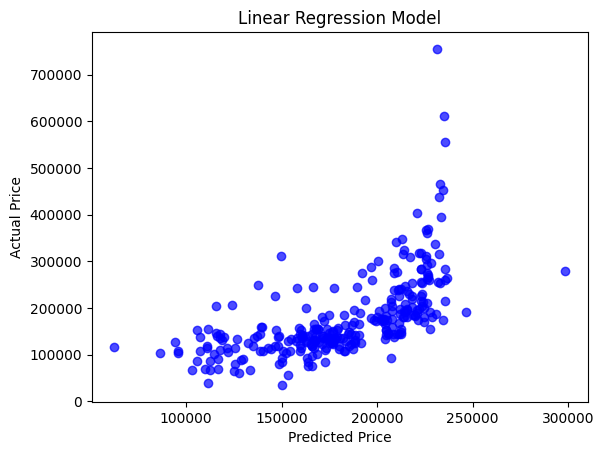

In [19]:
# alpha helps to show overlapping data
plt.scatter(predictions, y_test, alpha = 0.7, color = 'b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')

In [155]:
#fill missing values in LotFrontage with mean

df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [156]:
#drop alley and GarageYrBlt as it has more than 1300 missing values

df.drop(['Alley'],axis=1,inplace=True)
df.drop(['GarageYrBlt'],axis=1,inplace=True)

In [157]:
#fill the rest with mode

df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['FireplaceQu'] = df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [158]:
df['FireplaceQu'] = df['FireplaceQu'].bfill()
df['FireplaceQu'] = df['FireplaceQu'].fillna(df['FireplaceQu'].mode())
df['FireplaceQu'].replace(np.nan, 'Gd')

0       Gd
1       TA
2       TA
3       Gd
4       TA
        ..
1455    TA
1456    TA
1457    Gd
1458    Gd
1459    Gd
Name: FireplaceQu, Length: 1460, dtype: object

In [159]:
df.drop(['MiscFeature'],axis=1,inplace=True)
df.drop(['Fence'],axis=1,inplace=True)

In [160]:

df.drop(['PoolQC'],axis=1,inplace=True)

<AxesSubplot: >

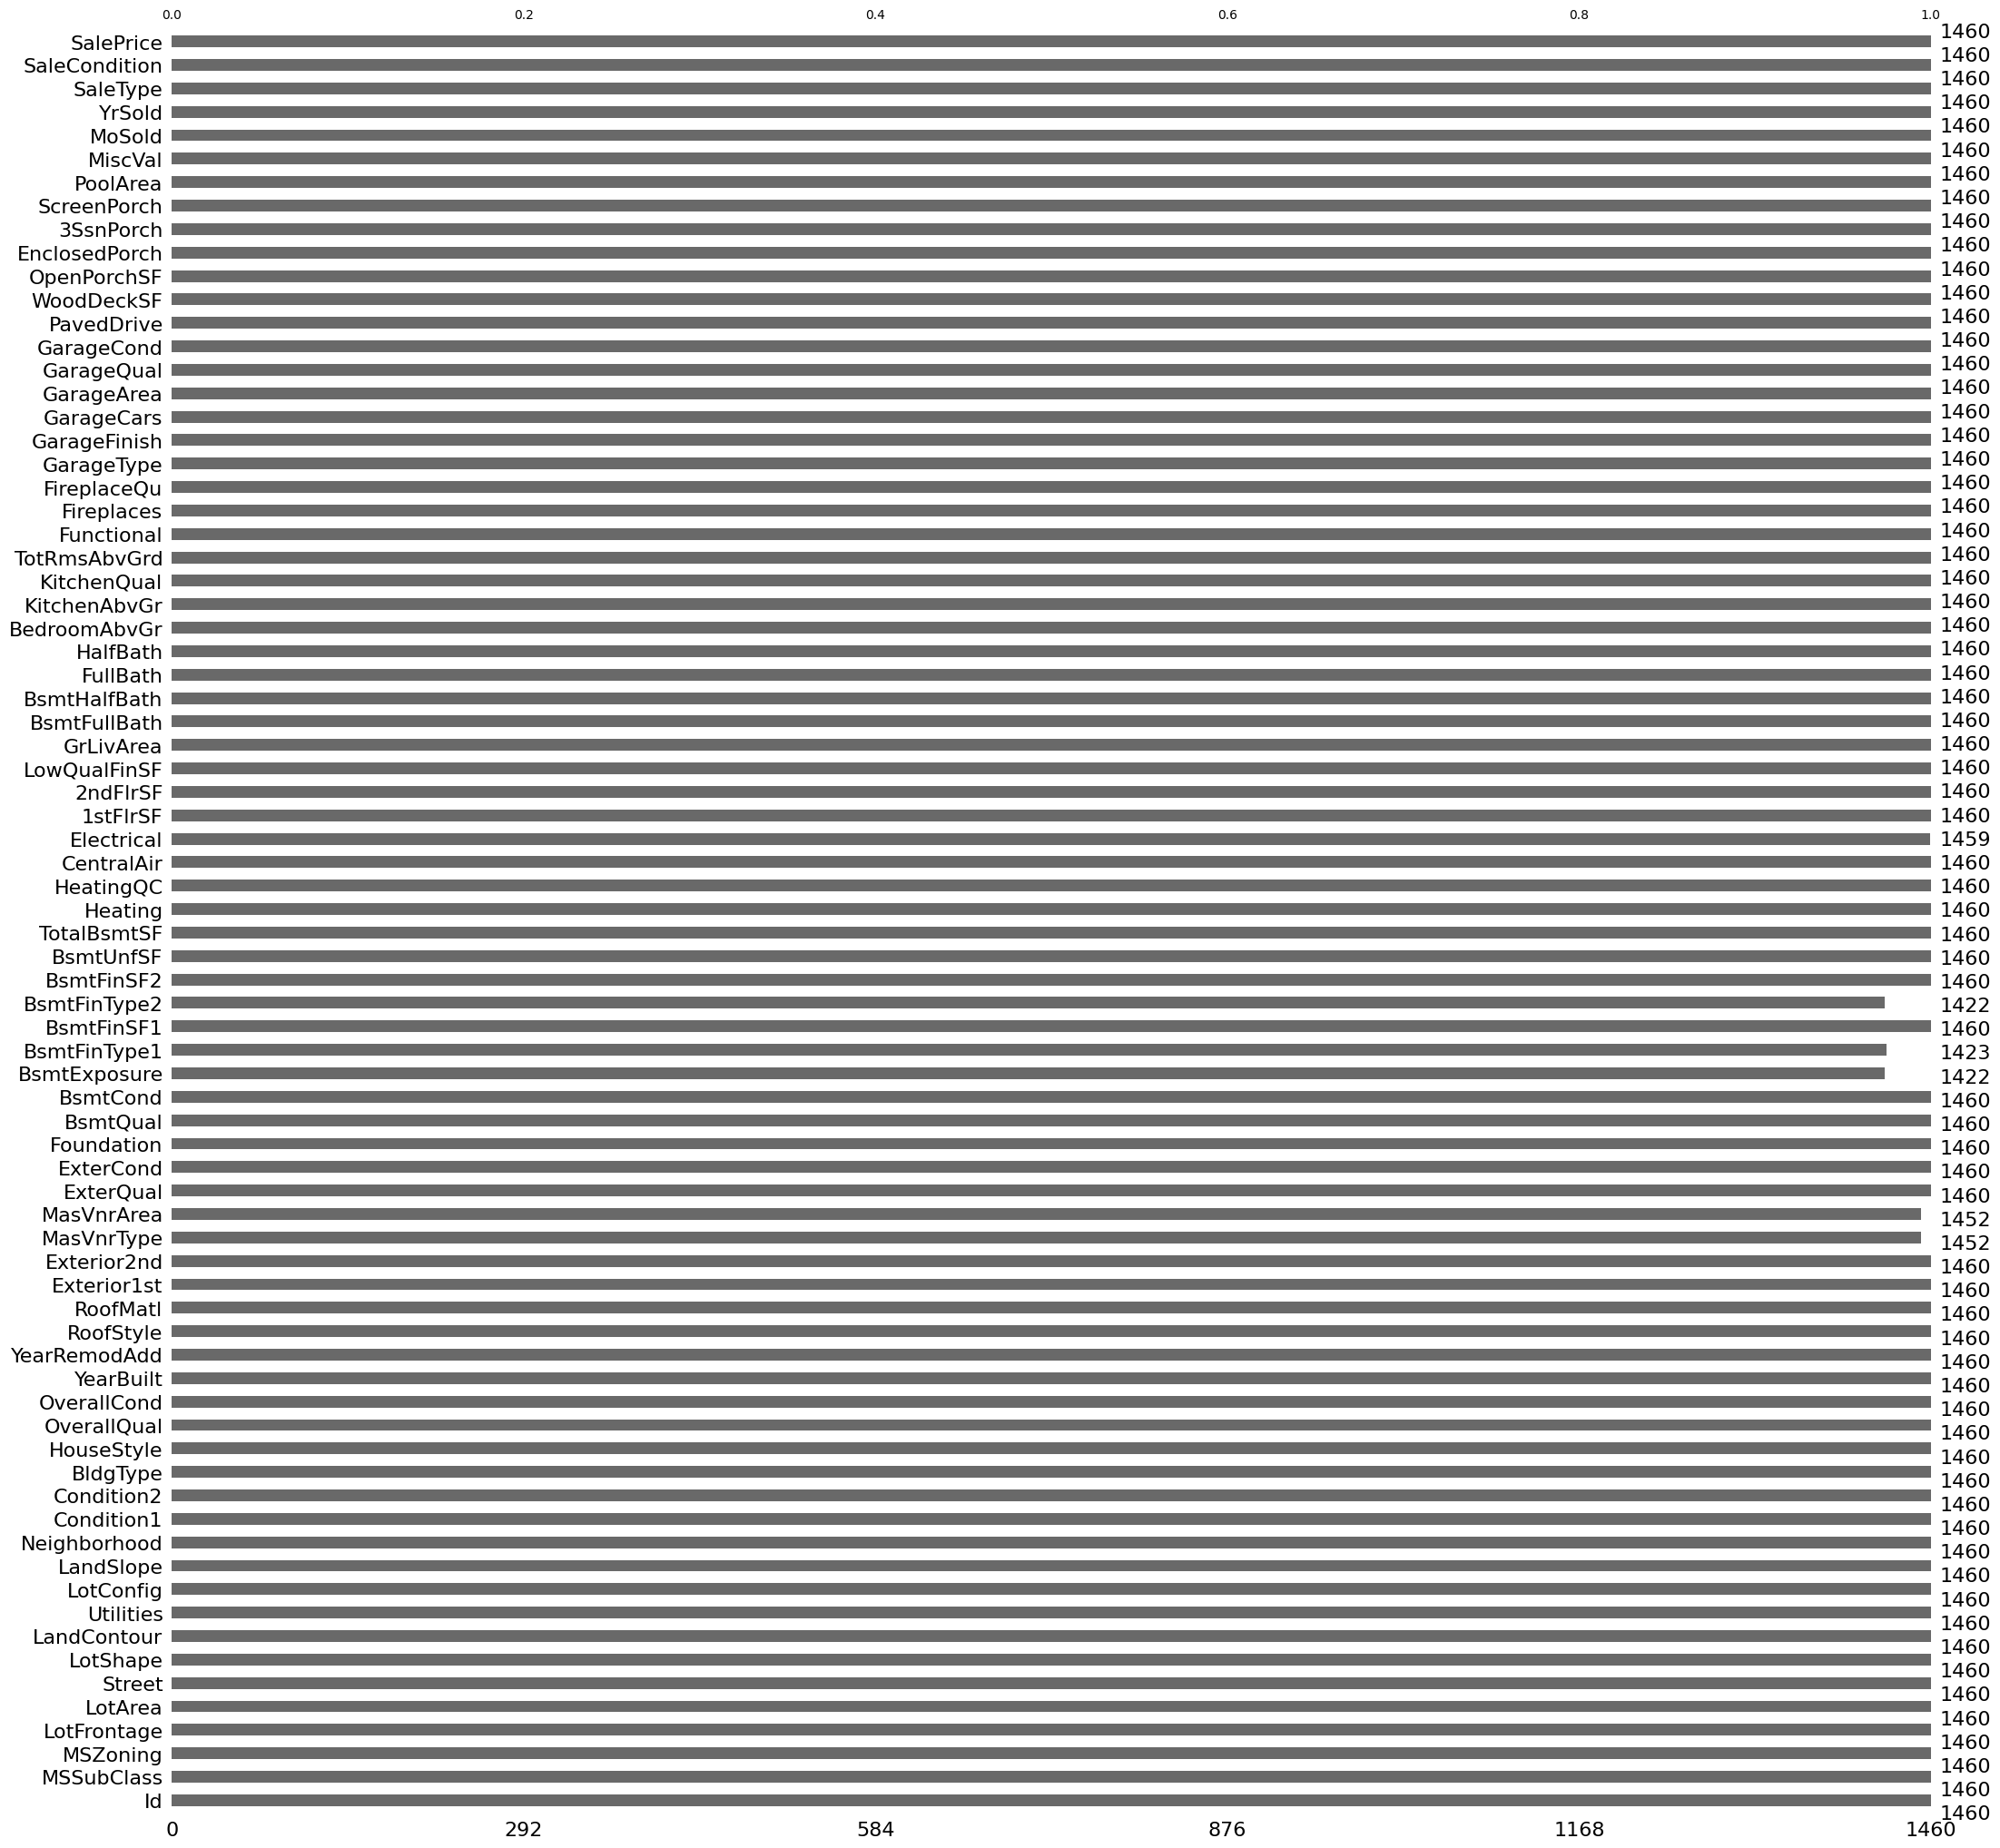

In [144]:
msno.bar(df)

handle categorical features

In [162]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [163]:
len(columns)

39

In [164]:
main_df=df.copy()

In [165]:
def category_onehot_multcols(multcolumns):
    df_final=df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(df[fields],drop_first=True)
        
        df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([df,df_final],axis=1)
        
    return df_final

In [166]:
test_df = pd.read_csv('test.csv')


In [167]:
test_df.shape

(1459, 80)

In [169]:
test_df['SalePrice'] = ''

In [170]:
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,


In [171]:
df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [172]:
df.shape

(1460, 237)

In [173]:
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Fa,Gd,Po,TA,Fa,Gd,Po,TA,P,Y
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,1,0,1
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,1,0,1
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,1,0,1
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,0,0,0,1,0,1
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,1,0,1
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,1,0,1
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,1,0,1
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,1,0,1


In [174]:
df_Train=df.iloc[:1422,:]
df_Test=df.iloc[1422:,:]

In [175]:
df_Train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Fa,Gd,Po,TA,Fa,Gd,Po,TA,P,Y
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,1,0,1
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,1,0,1
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,1,0,1
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,0,0,0,1,0,1
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,1,0,1


In [176]:
df_Test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Fa,Gd,Po,TA,Fa,Gd,Po,TA,P,Y
1422,1423,120,37.000000,4435,6,5,2003,2003,170.0,686,...,0,0,0,1,0,0,0,1,0,1
1423,1424,80,70.049958,19690,6,7,1966,1966,0.0,0,...,0,1,0,0,0,1,0,0,0,1
1424,1425,20,70.049958,9503,5,5,1958,1983,0.0,457,...,0,0,0,1,0,0,0,1,0,1
1425,1426,20,80.000000,10721,6,6,1959,1959,243.0,0,...,0,0,0,1,0,0,0,1,0,1
1426,1427,60,81.000000,10944,7,5,1994,1994,448.0,1000,...,0,0,0,1,0,0,0,1,0,1


In [177]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

C:\Users\Mariam_Mowafy\AppData\Local\Temp\ipykernel_29948\3985304647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Test.drop(['SalePrice'],axis=1,inplace=True)


In [178]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

the prediction algorithm

In [ ]:
//use linear regression

In [ ]:
#svm: Euclidean distance to get better estimates to clusters using the features they have

In [181]:
import xgboost
classifier=xgboost.XGBRegressor()
regressor=xgboost.XGBRegressor()
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }
# Set up the random search with 4-fold cross validation
random_cv = model_selection.RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


ValueError: 
All the 250 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Mariam_Mowafy\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mariam_Mowafy\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "C:\Users\Mariam_Mowafy\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py", line 1014, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
  File "C:\Users\Mariam_Mowafy\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py", line 448, in _wrap_evaluation_matrices
    train_dmatrix = create_dmatrix(
  File "C:\Users\Mariam_Mowafy\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py", line 934, in _create_dmatrix
    return DMatrix(**kwargs, nthread=self.n_jobs)
  File "C:\Users\Mariam_Mowafy\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "C:\Users\Mariam_Mowafy\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py", line 766, in __init__
    self.feature_names = feature_names
  File "C:\Users\Mariam_Mowafy\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py", line 1155, in feature_names
    raise ValueError('feature_names must be unique')
ValueError: feature_names must be unique


In [182]:
y_pred=regressor.predict(df_Test.drop(['SalePrice'],axis=1))

KeyError: "['SalePrice'] not found in axis"

In [ ]:
pred.columns=['SalePrice']
temp_df=df_Train['SalePrice'].copy()
temp_df.column=['SalePrice']
df_Train.drop(['SalePrice'],axis=1,inplace=True)
df_Train=pd.concat([df_Train,temp_df],axis=1)
df_Test.head()